In [1]:
import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

import backtrader as bt


src_path = '/Users/yifeining/Documents/GitHub/triplec-quant-trading/src'
if src_path not in sys.path:
    sys.path.insert(0, src_path)
    
from models import *
from strategy import *

In [2]:
# class Screener_SMA(bt.Analyzer):
#     params = (('period',20), ('devfactor',2),)

#     def start(self):
#         self.bband = {data: bt.indicators.BollingerBands(data,
#                 period=self.params.period, devfactor=self.params.devfactor)
#                 for data in self.datas}

#     def stop(self):
#         self.rets['over'] = list()
#         self.rets['under'] = list()

#         for data, band in self.bband.items():
#             node = data._name, data.close[0], round(band.lines.bot[0], 2)
#             if data > band.lines.bot:
#                 self.rets['over'].append(node)
#             else:
#                 self.rets['under'].append(node)

In [3]:
# load data
cerebro = bt.Cerebro()
dir_path = '/Users/yifeining/Documents/GitHub/triplec-quant-trading'

datapath1 = os.path.join(dir_path, 'data', 'survivorship-free', 'MSFT.csv')
datapath2 = os.path.join(dir_path, 'data', 'survivorship-free', 'GOOG.csv')

data1 = bt.feeds.YahooFinanceCSVData(
    dataname=datapath1,
    fromdate=datetime.datetime(2015, 1, 1),
    todate=datetime.datetime(2015, 12, 1), 
    reverse=False)
cerebro.adddata(data1)

data2 = bt.feeds.YahooFinanceCSVData(
    dataname=datapath2,
    fromdate=datetime.datetime(2015, 1, 1),
    todate=datetime.datetime(2015, 12, 1),
    reverse=False)

data2.compensate(data1)  # let the system know ops on data1 affect data0
data2.plotinfo.plotmaster = data1
data2.plotinfo.sameaxis = True
cerebro.adddata(data2)

In [4]:


# Add a strategy
cerebro.addstrategy(TestStrategy)



# Set our desired cash start
cerebro.broker.setcash(10000.0)

# Add a FixedSize sizer according to the stake
cerebro.addsizer(bt.sizers.FixedSize, stake=10)

# Set the commission - 0.1% ... divide by 100 to remove the %
cerebro.broker.setcommission(commission=0.001)

print('Initial Portfolio Value: %.2f' % cerebro.broker.getvalue())
# Run over everything
cerebro.run()
# cerebro.run(runonce=False, stdstats=False, writer=True)


Initial Portfolio Value: 10000.00
2015-01-02, Close, 27913852.00
2015-01-05, Close, 39673865.00
2015-01-06, Close, 36447854.00
2015-01-07, Close, 29114061.00
2015-01-07, BUY CREATE, 29114061.00
2015-01-08, Order Canceled/Margin/Rejected
2015-01-08, Close, 29645202.00
2015-01-09, Close, 23715642.00
2015-01-12, Close, 23651887.00
2015-01-12, BUY CREATE, 23651887.00
2015-01-13, Order Canceled/Margin/Rejected
2015-01-13, Close, 35270601.00
2015-01-14, Close, 29719580.00
2015-01-15, Close, 32750779.00
2015-01-16, Close, 35695289.00
2015-01-20, Close, 36161860.00
2015-01-21, Close, 39081143.00
2015-01-22, Close, 35898035.00
2015-01-23, Close, 26211594.00
2015-01-23, BUY CREATE, 26211594.00
2015-01-26, Order Canceled/Margin/Rejected
2015-01-26, Close, 42525530.00
2015-01-27, Close, 169163953.00
2015-01-28, Close, 84507078.00
2015-01-29, Close, 63585273.00
2015-01-29, BUY CREATE, 63585273.00
2015-01-30, Order Canceled/Margin/Rejected
2015-01-30, Close, 78004944.00
2015-02-02, Close, 50352532.0

<IPython.core.display.Javascript object>


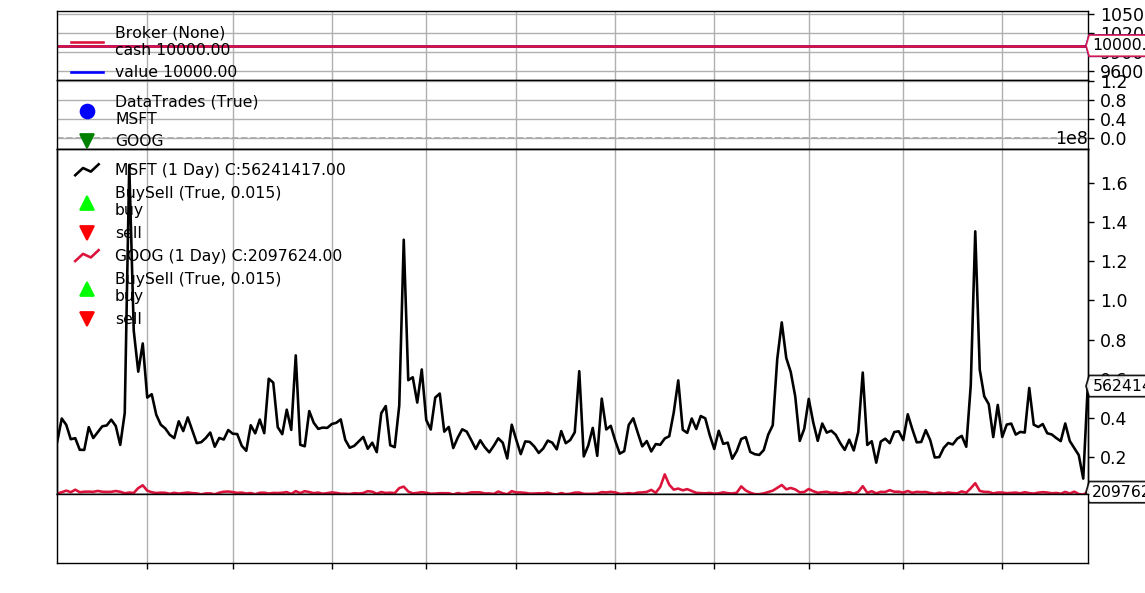

[[<Figure size 640x480 with 5 Axes>]]

In [5]:
cerebro.plot()


In [6]:
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Final Portfolio Value: 10000.00
